In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import imageio

In [2]:
col_names_extended = ['Lagrangian mass coordinate (M0)',
             'Radius coordinate (R0)',
             'Luminosity (L0)',
             'Total pressure (N m-2)',
             'Density (kg m-3)',
             'Temperature (K)',
             'Specific internal energy (J kg-1)',
             'Specific entropy (J K-1 kg-1)',
             'Specific heat at constant pressure (J K-1 kg-1)',
             'First adiabatic exponent',
             'Adiabatic temperature gradient',
             'Mean molecular weight',
             'Electron number density (m-3)',
             'Electron pressure (N m-2)',
             'Radiation pressure (N m-2)',
             'Radiative temperature gradient',
             'Material temperature gradient',
             'Convective velocity (m s-1)',
             'Rosseland mean opacity (m2 kg-1)',
             'Power per unit mass from all nuclear reactions, excluding neutrino losses (W kg-1)',
             'Power per unit mass from PP chain (W kg-1)',
             'Power per unit mass from CNO cycle (W kg-1)',
             'Power per unit mass from triple-alpha reaction (W kg-1)',
             'Power loss per unit mass in nuclear neutrinos (W kg-1)',
             'Power loss per unit mass in non-nuclear neutrinos (W kg-1)',
             'Power per unit mass from gravitational contraction (W kg-1)',
             'Hydrogen mass fraction (all ionization stages)',
             'Molecular hydrogen mass fraction',
             'Singly-ionized hydrogen mass fraction',
             'Helium mass fraction (all ionization stages)',
             'Singly-ionized helium mass fraction',
             'Doubly-ionized helium mass fraction',
             'Carbon mass fraction',
             'Nitrogren mass fraction',
             'Oxygen mass fraction',
             'Electron degeneracy parameter']

In [3]:
# data_1_5 = pd.read_fwf('Data1_5/Data0_01/summary_SI.txt', names=col_names, index_col=0)
# data_20 = pd.read_fwf('Data20/Data0_01/summary_SI.txt', names=col_names, index_col=0)

data_1_5_extended = pd.read_fwf('Data1_5/Data0_01/Detailed/structure_00374.txt', names=col_names_extended, index_col=0)
data_20_extended = pd.read_fwf('Data20/Data0_01/Detailed/structure_00374.txt', names=col_names_extended, index_col=0)

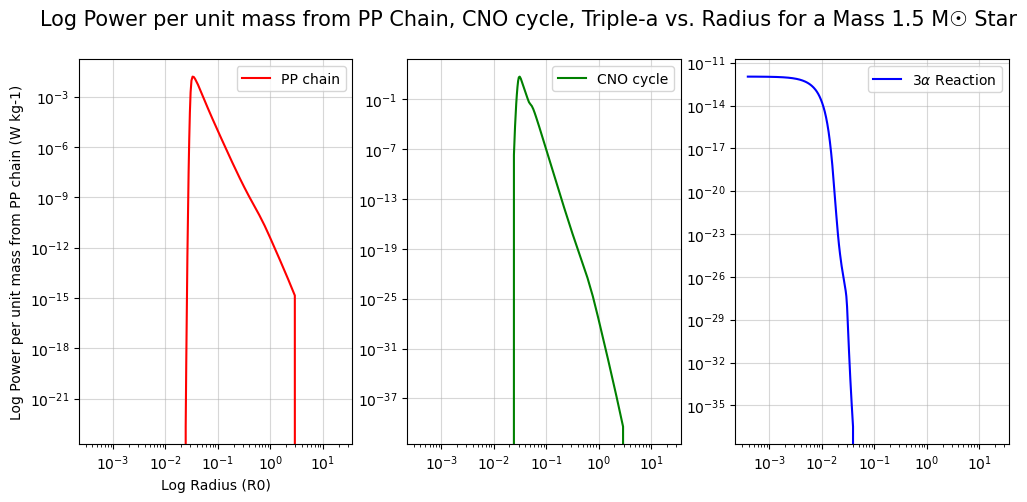

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

#'Power per unit mass from PP chain (W kg-1)'
ax[0].plot(data_1_5_extended['Radius coordinate (R0)'], data_1_5_extended['Power per unit mass from PP chain (W kg-1)'], linestyle='-', c='r', label='PP chain')
ax[1].plot(data_1_5_extended['Radius coordinate (R0)'], data_1_5_extended['Power per unit mass from CNO cycle (W kg-1)'], linestyle='-', c='g', label='CNO cycle')
ax[2].plot(data_1_5_extended['Radius coordinate (R0)'], data_1_5_extended['Power per unit mass from triple-alpha reaction (W kg-1)'], linestyle='-', c='b', label=r'3$\alpha$ Reaction')

ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].grid(alpha=0.5)
ax[1].grid(alpha=0.5)
ax[2].grid(alpha=0.5)

ax[0].set_xlabel('Log Radius (R0)')
ax[0].set_ylabel('Log Power per unit mass from PP chain (W kg-1)')

#ax[0].set_title('Mass 1.5 M☉ Star')
#ax[1].set_title('Mass 20 M☉ Star')
fig.suptitle('Log Power per unit mass from PP Chain, CNO cycle, Triple-a vs. Radius for a Mass 1.5 M☉ Star', fontsize=15);

In [ ]:
filenames = []

def PlotMaker3DProjected(angle):
    fig = plt.figure(angle,figsize=(12,12))
    for range1 in range(anim_data.shape[0]):
        ax.scatter(anim_data.iloc[range1,0], anim_data.iloc[range1,1],
                       anim_data.iloc[range1,2], s=100, color=color_map_3[range1],
                       marker=markers[range1], label= age_data[range1])

    PCA_Axis_x = ((min(anim_data.iloc[:,0]), max(anim_data.iloc[:,0])), (0, 0), (0,0))
    ax.plot(PCA_Axis_x[0],PCA_Axis_x[1],PCA_Axis_x[2],'black',label='Principal Axis 1')
        
    PCA_Axis_y = ((0,0),(min(anim_data.iloc[:,1]),max(anim_data.iloc[:,1])),(0,0))
    ax.plot(PCA_Axis_y[0],PCA_Axis_y[1], PCA_Axis_y[2],'b',
                label='Principal Axis 2')
        
    PCA_Axis_z = ((0,0),(0,0),(min(anim_data.iloc[:,2]),max(anim_data.iloc[:,2])))
    ax.plot(PCA_Axis_z[0], PCA_Axis_z[1], PCA_Axis_z[2], 'r',
                label='Principal Axis 3')
        
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.set_title("PCA Of Frequency of Drug Use")
        
    lgd = ax.legend(loc="center right", bbox_to_anchor=(0.78, 0.25, 0.45, 0.45), title='Age/Axes')

    ax.view_init(15,angle)
    ax.set_position([0,0,1,1])

    outFilename = "AnimationStep_%d.png" % (angle)
    outFilepath = '6DProjAnimation/'+ "AnimationStep_%d.png" % (angle)
    filenames.append(outFilename)
    fig.savefig(outFilepath, dpi=80, bbox_extra_artists=(lgd,), pad_inches=0.2)
    
    plt.close()